In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,precision_score, recall_score, roc_auc_score, roc_curve)
from sklearn.datasets import load_breast_cancer

In [2]:
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nTarget Distribution:")
print(df['target'].value_counts())
print("\nTarget Meaning:")
print("0 = Malignant (Cancerous), 1 = Benign (Non-cancerous)")

print("\nBasic Statistics:")
print(df.describe())

Dataset Shape: (569, 31)

First 5 rows:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst

In [3]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


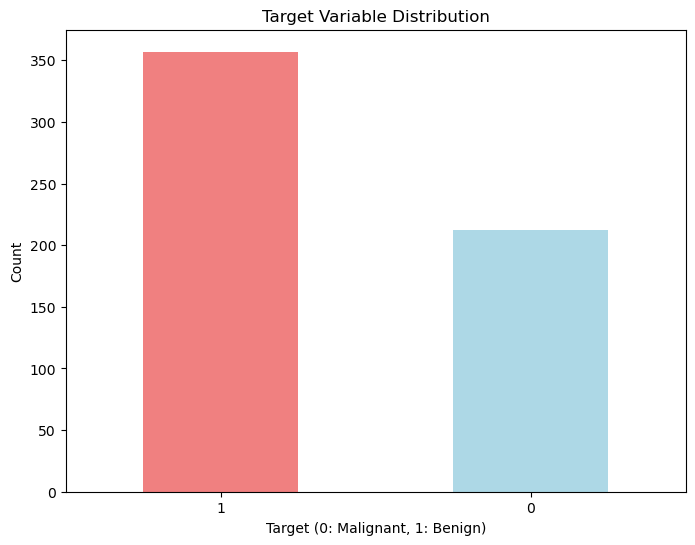

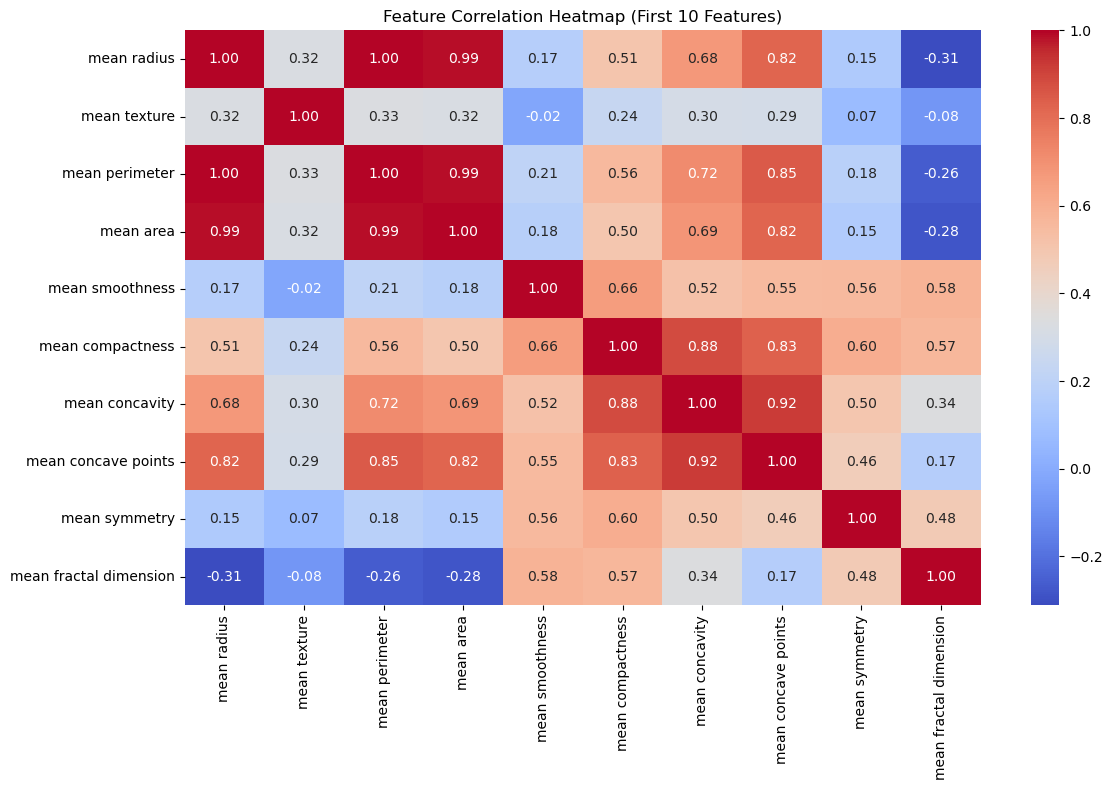

In [4]:
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Target Variable Distribution')
plt.xlabel('Target (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:, :10].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap (First 10 Features)')
plt.tight_layout()
plt.show()

In [5]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)
print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts()}")
print(f"Test target distribution:\n{y_test.value_counts()}")

Training set size: (455, 30)
Test set size: (114, 30)
Training target distribution:
target
1    285
0    170
Name: count, dtype: int64
Test target distribution:
target
1    72
0    42
Name: count, dtype: int64


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1] 
print("Logistic Regression Model Training Completed!")
print(f"Model Coefficients: {len(log_reg.coef_[0])}")
print(f"Model Intercept: {log_reg.intercept_[0]:.4f}")

Logistic Regression Model Training Completed!
Model Coefficients: 30
Model Intercept: 0.3022


In [8]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

Confusion Matrix:
[[41  1]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Precision: 0.9861
Recall: 0.9861
ROC-AUC Score: 0.9954


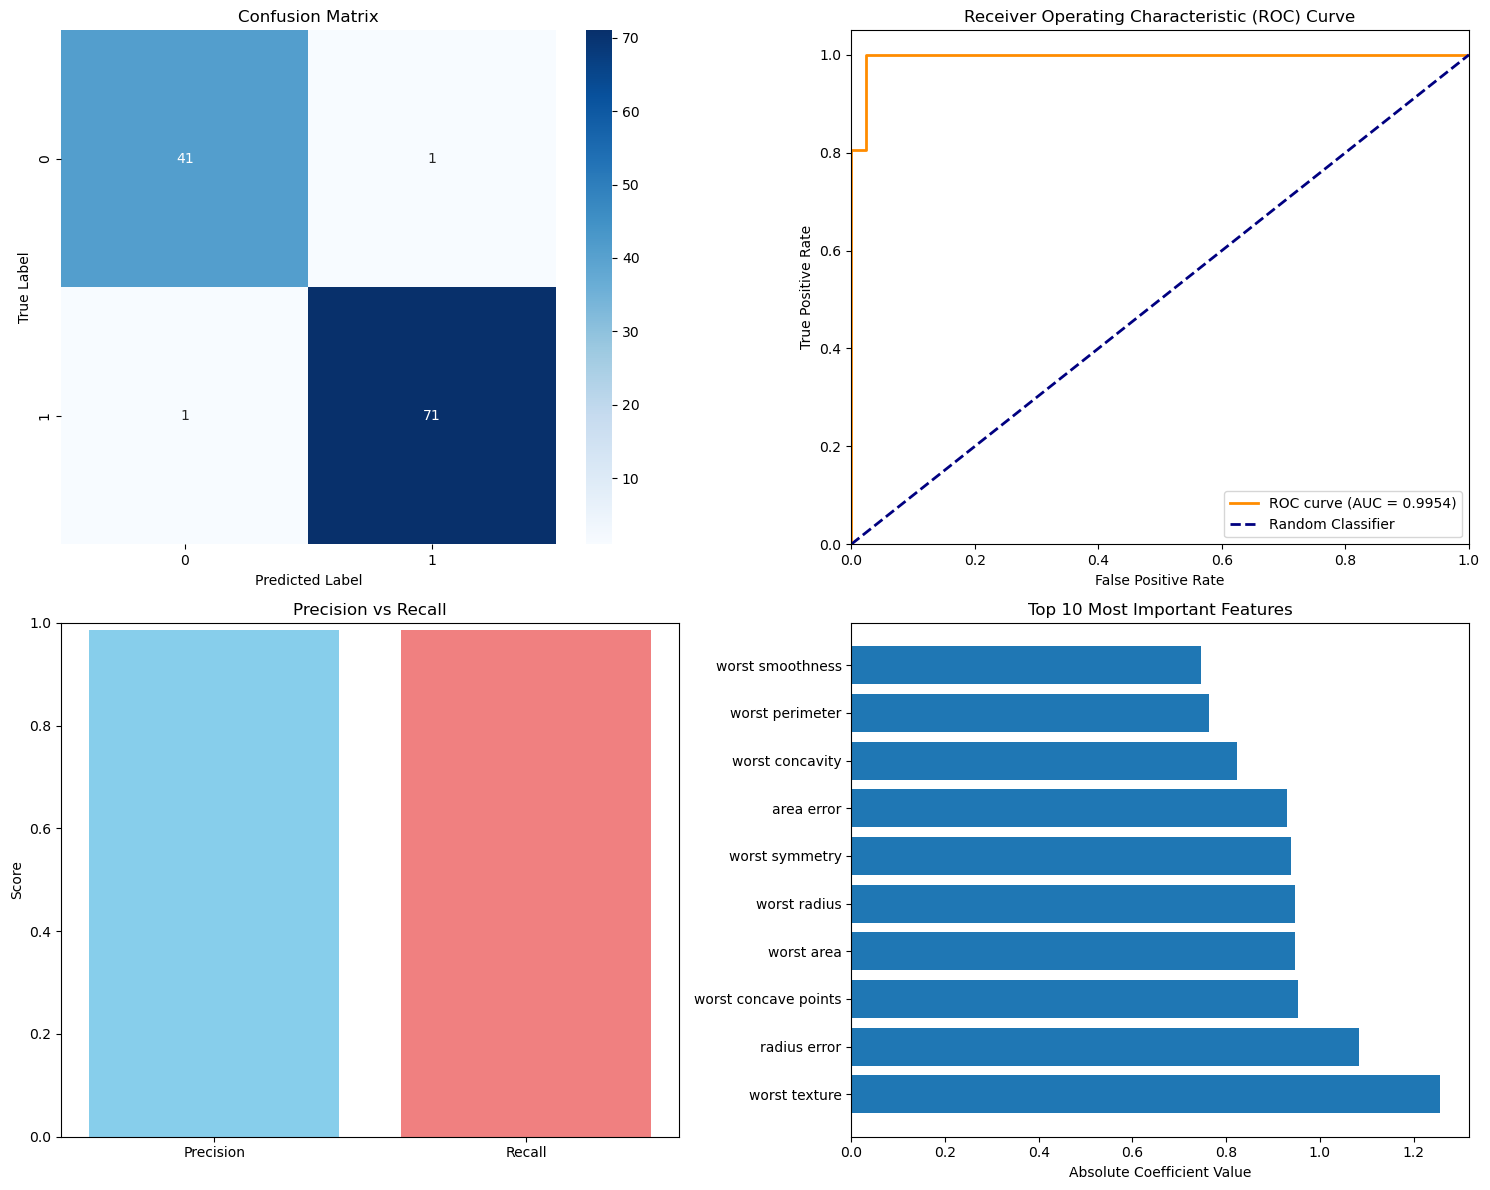

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Label')
axes[0, 0].set_ylabel('True Label')
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
axes[0, 1].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
axes[0, 1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
axes[0, 1].set_xlim([0.0, 1.0])
axes[0, 1].set_ylim([0.0, 1.05])
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('Receiver Operating Characteristic (ROC) Curve')
axes[0, 1].legend(loc="lower right")

metrics_df = pd.DataFrame({
    'Metric': ['Precision', 'Recall'],
    'Score': [precision, recall]
})
axes[1, 0].bar(metrics_df['Metric'], metrics_df['Score'], color=['skyblue', 'lightcoral'])
axes[1, 0].set_ylim(0, 1)
axes[1, 0].set_title('Precision vs Recall')
axes[1, 0].set_ylabel('Score')

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(log_reg.coef_[0])
}).sort_values('importance', ascending=False).head(10)
axes[1, 1].barh(feature_importance['feature'], feature_importance['importance'])
axes[1, 1].set_title('Top 10 Most Important Features')
axes[1, 1].set_xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

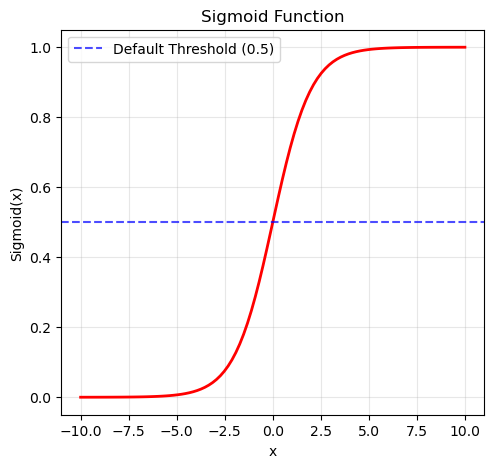

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_values = np.linspace(-10, 10, 100)
y_sigmoid = sigmoid(x_values)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x_values, y_sigmoid, color='red', linewidth=2)
plt.axhline(y=0.5, color='blue', linestyle='--', alpha=0.7, label='Default Threshold (0.5)')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.grid(True, alpha=0.3)
plt.legend()

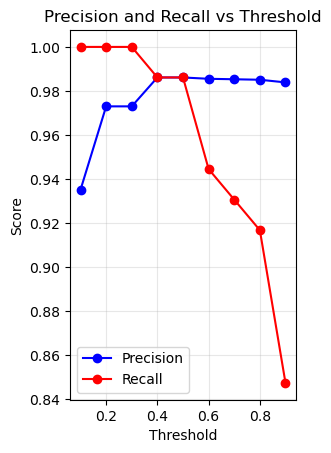

Threshold Analysis:
Threshold 0.1: Precision = 0.935, Recall = 1.000
Threshold 0.2: Precision = 0.973, Recall = 1.000
Threshold 0.3: Precision = 0.973, Recall = 1.000
Threshold 0.4: Precision = 0.986, Recall = 0.986
Threshold 0.5: Precision = 0.986, Recall = 0.986
Threshold 0.6: Precision = 0.986, Recall = 0.944
Threshold 0.7: Precision = 0.985, Recall = 0.931
Threshold 0.8: Precision = 0.985, Recall = 0.917
Threshold 0.9: Precision = 0.984, Recall = 0.847


In [12]:
thresholds = np.arange(0.1, 1.0, 0.1)
precisions = []
recalls = []

for threshold in thresholds:
    y_pred_custom = (y_pred_proba >= threshold).astype(int)
    precisions.append(precision_score(y_test, y_pred_custom))
    recalls.append(recall_score(y_test, y_pred_custom))

plt.subplot(1, 2, 2)
plt.plot(thresholds, precisions, 'o-', label='Precision', color='blue')
plt.plot(thresholds, recalls, 'o-', label='Recall', color='red')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print("Threshold Analysis:")
for i, threshold in enumerate(thresholds):
    print(f"Threshold {threshold:.1f}: Precision = {precisions[i]:.3f}, Recall = {recalls[i]:.3f}")